# **ATM transactions**


In [19]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#loading the dataset
df=pd.read_csv("atm bank dataset.csv")
df.head()

,id,atm_name,weekday,festival_religion,working_day,holiday_sequence,trans_date_set,trans_month,trans_year,prevweek_mean,total_amount_withdrawn
0,11,Mount Road ATM,MONDAY,NH,W,WWW,1,1,2011,648600,897100
1,16,Mount Road ATM,TUESDAY,NH,W,WWW,1,1,2011,648600,826000
2,21,Mount Road ATM,WEDNESDAY,NH,W,WWW,1,1,2011,648600,754400
3,26,Mount Road ATM,THURSDAY,NH,W,WWW,2,1,2011,648600,834200
4,31,Mount Road ATM,FRIDAY,NH,W,WWW,2,1,2011,648600,575300


In [20]:
print(df.shape )
#for knowing statastical values
df.describe()
import warnings
warnings.filterwarnings("ignore")


(2244, 11)




*   2244 rows and 11 columns




In [21]:
#check the datatype of each variable
print(df.dtypes)
print()
#checking null values
print(df.isnull().sum())

#drop 1st and 2nd column from the dataset
df = df.drop(df.columns[[0,1]], axis=1) 

id                         int64
atm_name                  object
weekday                   object
festival_religion         object
working_day               object
holiday_sequence          object
trans_date_set             int64
trans_month                int64
trans_year                 int64
prevweek_mean              int64
total_amount_withdrawn     int64
dtype: object

id                        0
atm_name                  0
weekday                   0
festival_religion         0
working_day               0
holiday_sequence          0
trans_date_set            0
trans_month               0
trans_year                0
prevweek_mean             0
total_amount_withdrawn    0
dtype: int64


* There is no Null values.

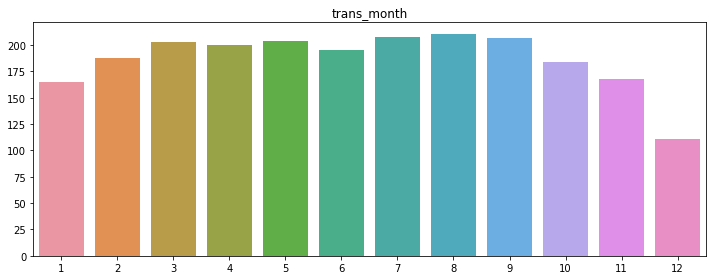

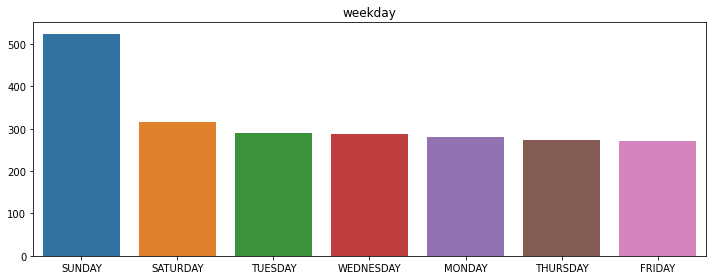

In [22]:
categorcial_variables = ['trans_month','weekday']
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    sns.barplot(df[col].value_counts().index,df[col].value_counts().values)
    plt.title(col)
    plt.tight_layout()

As we can see in the bar plot, Saturdays and Sundays are the most active days to withdraw money.


In [5]:
#categorical to numerical
df=pd.get_dummies(df,columns=['weekday','festival_religion','working_day','holiday_sequence'])
df.shape

(2244, 27)

After OHE we have 2244 observations with 27 columns (features).

<AxesSubplot:>

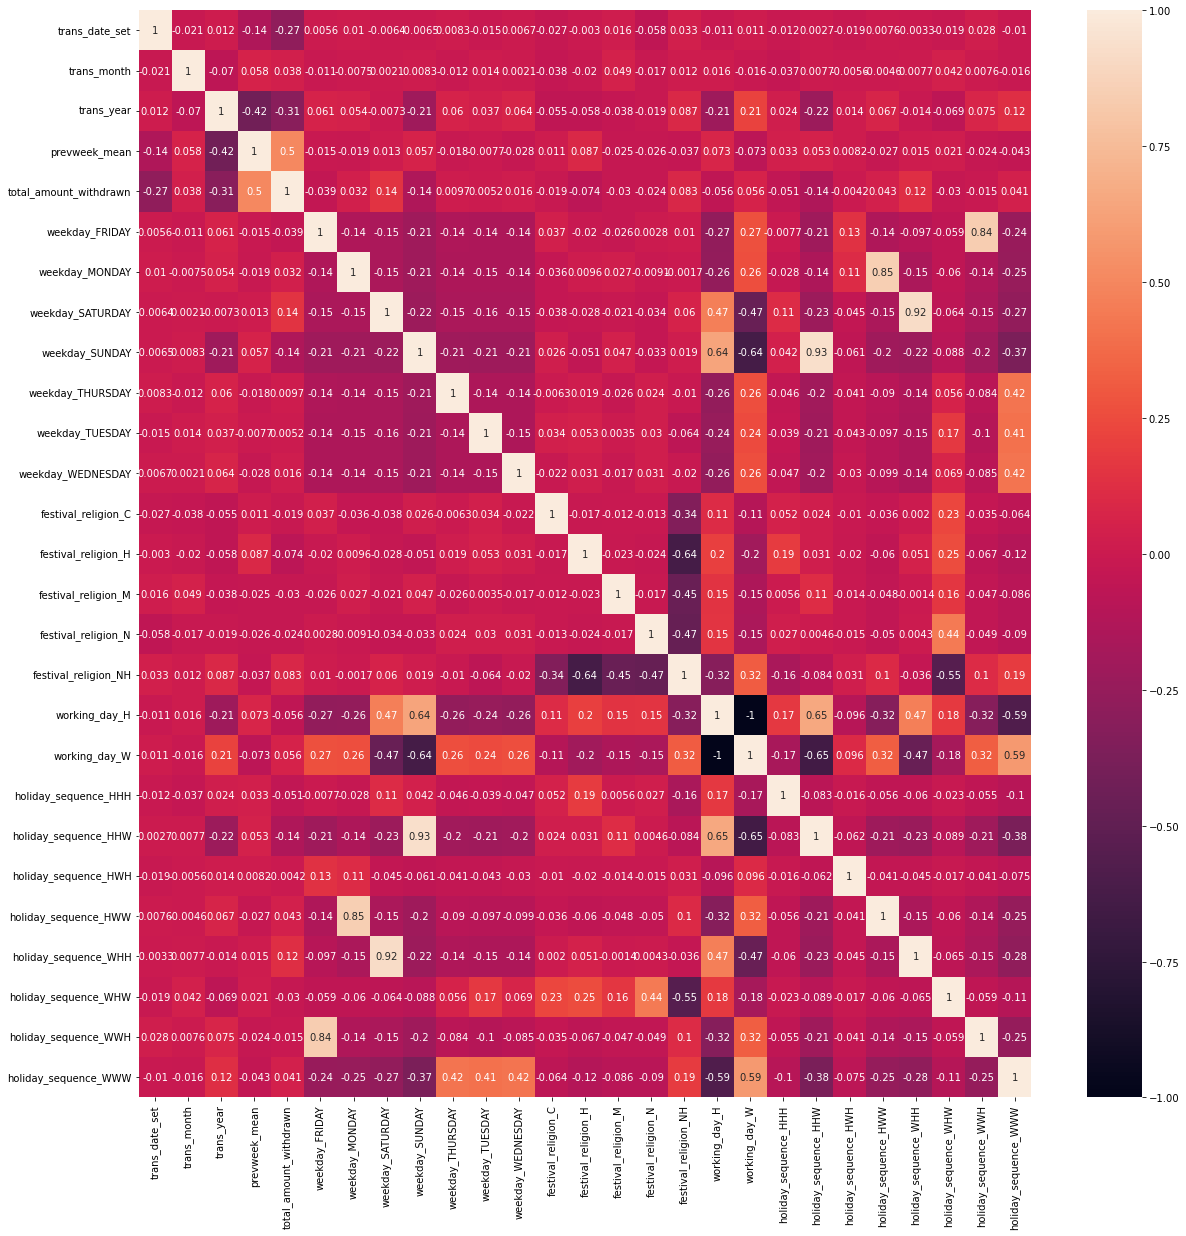

In [6]:
#heatmap of correlation between each variable
corr=df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [7]:
#selecting one feature amoung highly correlated varible
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df.columns[columns]
df1 = df[selected_columns]

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

In [10]:

x = df1.drop(columns = ['total_amount_withdrawn'])
y = df1['total_amount_withdrawn']


xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.20)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

#scaling target variable
ytrain=sc.fit_transform(ytrain.values.reshape(-1,1))
ytest=sc.transform(ytest.values.reshape(-1,1))



(1795, 24) (449, 24) (1795,) (449,)


#Linear Regression


In [11]:
model=LinearRegression()
model.fit(xtrain,ytrain)
pred=model.predict(xtest)


In [12]:
#calculating RMSE,MSE,MAE and r2_score
from sklearn import metrics
MAE_lr=metrics.mean_absolute_error(ytest,pred)
MSE_lr=metrics.mean_squared_error(ytest,pred)
RMSE_lr=np.sqrt(MSE_lr)
r2_lr=metrics.r2_score(ytest,pred)

print(MAE_lr)
print(MSE_lr)
print(RMSE_lr)                    
print(r2_lr)

0.6288980184772512
0.6593527935590164
0.8120054147350352
0.31756379100112486


#Support Vector Regression

In [23]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(xtrain,ytrain)

y_pred = regressor.predict(xtest)

In [24]:
MAE_svr=metrics.mean_absolute_error(ytest,y_pred)
MSE_svr=metrics.mean_squared_error(ytest,y_pred)
RMSE_svr=np.sqrt(MSE_svr)
r2_svr=metrics.r2_score(ytest,y_pred)

print(MAE_svr)
print(MSE_svr)
print(RMSE_svr)   
print(r2_svr)

0.5617421043212417
0.5442958628323418
0.7377640970068561
0.43664877310961436
